<a href="https://colab.research.google.com/github/ToghrulUTD/AMEX-Credit-Card-Default-Prediction/blob/main/Instacart_customer_and_product_analytics_reorder_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Orders Dataset
For information about Dataset click [here](https://www.kaggle.com/competitions/instacart-market-basket-analysis/data).

In [ ]:
# Get and uzip dataset files
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c instacart-market-basket-analysis
! unzip instacart-market-basket-analysis.zip
! unzip orders.csv.zip
! unzip aisles.csv.zip
! unzip departments.csv.zip
! unzip products.csv.zip
! unzip order_products__prior.csv.zip

In [ ]:
# Load Orders Dataset
import pandas as pd
import numpy as np

orders = pd.read_csv('orders.csv')
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
print(f'Number of Orders: {orders.shape[0]}')
print(f'Number of Users: {orders.user_id.nunique()}')
print(f'Median Order Frequency per week: {7/orders.days_since_prior_order.median()}')
print(f'Busiest hour of the Day: {orders.order_hour_of_day.median()}:00')
print(f'Busiest day of the the week: {orders.order_dow.median()}')

Number of Orders: 3421083
Number of Users: 206209
Median Order Frequency per week: 1.0
Busiest hour of the Day: 13.0:00
Busiest day of the the week: 3.0


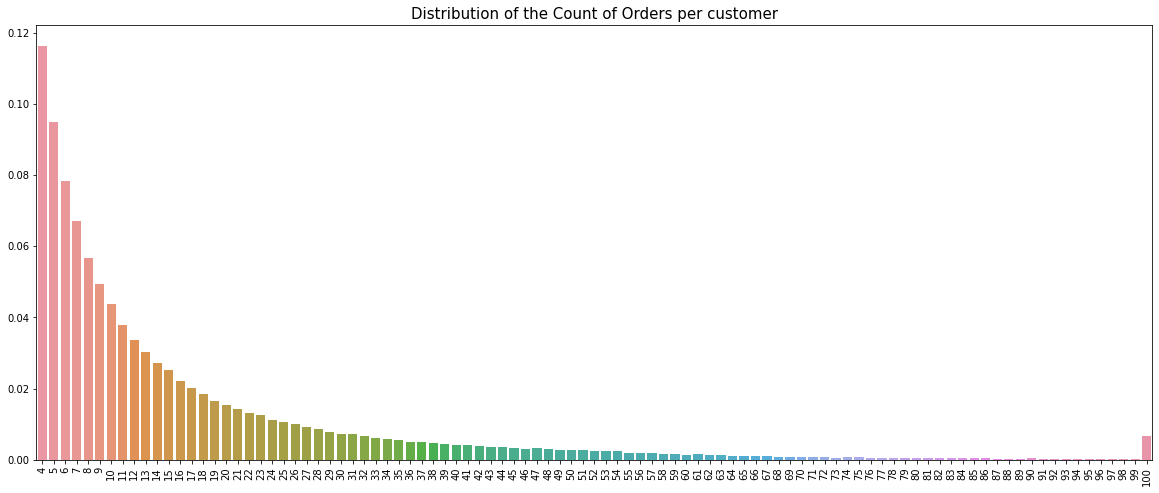

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Calculate the count of orders by each user
order_count = orders.groupby('user_id').order_number.count().value_counts()
plt.figure(figsize = (20,8))
sns.barplot(order_count.index, order_count.values/sum(order_count.values))
plt.title('Distribution of the Count of Orders per customer', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

There are no orders less than 4 and is max capped at 100 as can be seen from a spike at 100 (far right).

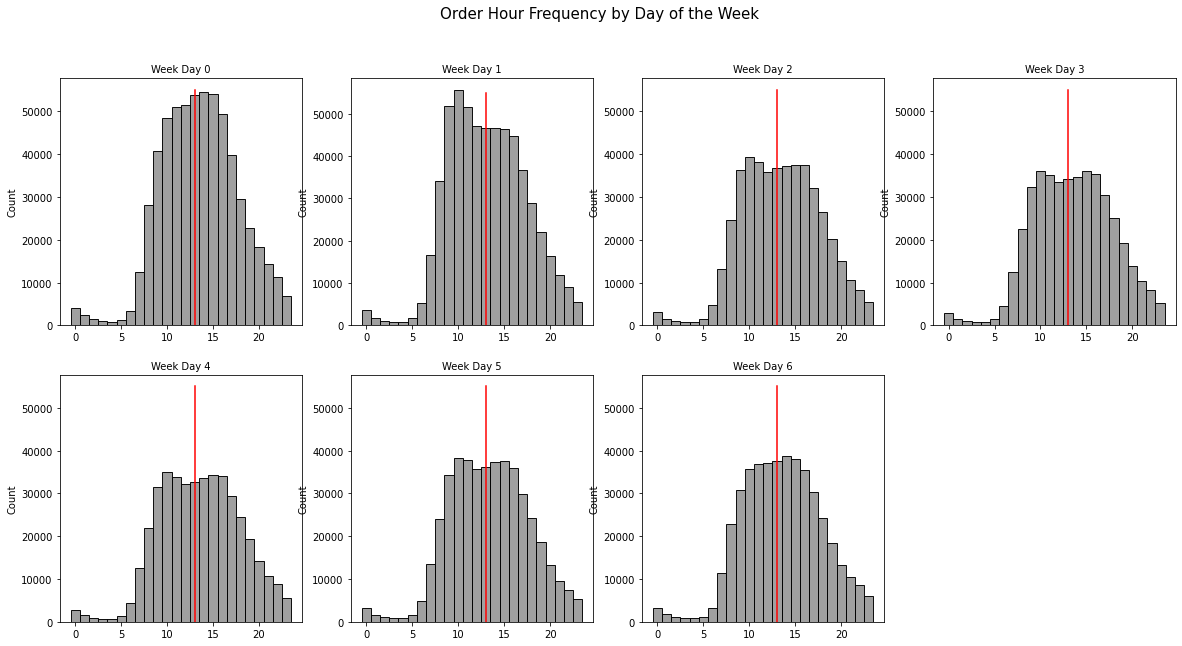

In [ ]:
# Create histograms of order hours by week day 
plt.figure(figsize = (20, 10))
for day in range(7):
  subset = orders[orders.order_dow == day]
  plt.subplot(2,4,day+1)
  ax = sns.histplot(data = subset, x = 'order_hour_of_day', stat = 'count', discrete = True,  color = 'grey')
  plt.plot([orders.order_hour_of_day.median(), orders.order_hour_of_day.median()], [0, 55000], color='red', label = 'median')
  plt.title(f'Week Day {day}', fontsize = 10)
  plt.xlabel('')
plt.subplot(2,4,day+2)
plt.axis(False)
plt.suptitle('Order Hour Frequency by Day of the Week', fontsize = 15)
plt.show()

Overall, order hours are is approximately bell shaped around 14:00 for all weekdays. However, we can see that weekends have higer order count than workdays.

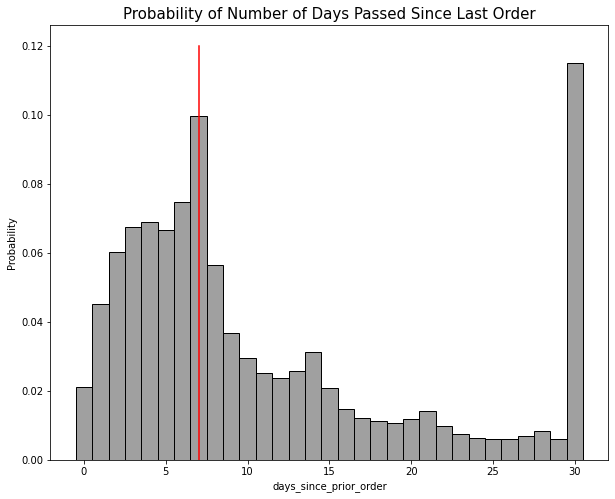

In [ ]:
# Create histogram of order frequencies 
plt.figure(figsize = (10,8))
ax = sns.histplot(data = orders, x = 'days_since_prior_order', stat = 'probability', discrete = True,  color = 'grey')
plt.plot([orders.days_since_prior_order.median(), orders.days_since_prior_order.median()], [0, 0.12], color='red', label = 'median')
plt.title(f'Probability of Number of Days Passed Since Last Order', fontsize = 15)
plt.show()

Most users are using the service once a week, as can be seen from the median value of 6.5 (red line). And, there is a big spike on 30, that is, almost 10 percent of the orders are 30 days after the previous order.

# Explore Transactions 

In [ ]:
# read product/order datasets
aisles = pd.read_csv('aisles.csv')
departments =  pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')
prior = pd.read_csv('order_products__prior.csv')

# Print shape, and first few rows from prior orders dataset
print(f'Prior order-products dataset shape: {prior.shape}\n')
prior.head(3)

Prior order-products dataset shape: (32434489, 4)



,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


## Department Size/Diversity

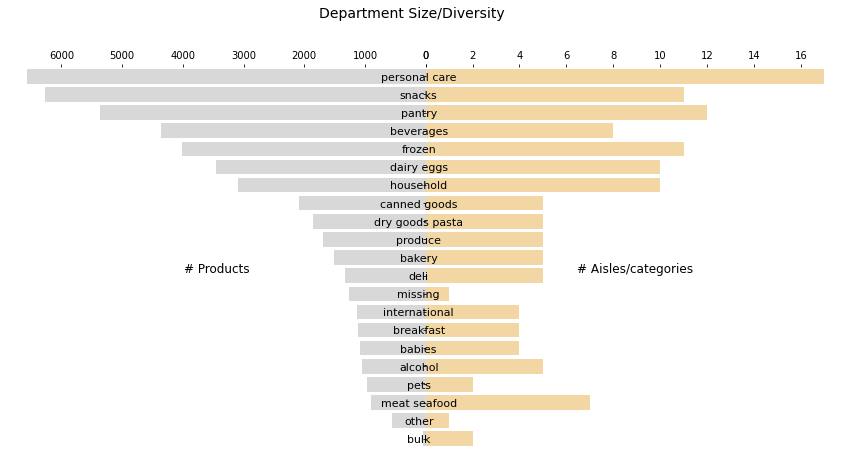

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
dep_n_products = products.merge(departments, on='department_id').groupby('department')\
                          .product_id.nunique().sort_values(ascending = False)
ax = sns.barplot(dep_n_products.values, dep_n_products.index,  alpha = 0.3, color = 'grey')       
ax.set_yticklabels(dep_n_products.index, ha='center', minor = False )
ax.invert_xaxis() # bars from right to left
ax.spines[['right','top','left', 'bottom']].set_visible(False) # hide axis lines
plt.tick_params(labelleft = False, left=False, bottom = False, top = True, labelbottom=False, labeltop=True) # remove all except top xticks
plt.title('# Products', fontsize = 12, y=0.5, pad=-15) # place title to the middle of the plot 
plt.ylabel('')

plt.subplot(1,2,2)
dep_n_category = products.merge(departments, on='department_id')\
                         .groupby('department')\
                         .aisle_id.nunique()[dep_n_products.index]
ax = sns.barplot(dep_n_category.values, dep_n_category.index, alpha = 0.4, color = 'orange')
ax.set_yticklabels(dep_n_products.index, ha='center', minor = False, fontsize = 11)
ax.spines[['right','top','left', 'bottom']].set_visible(False)
plt.tick_params(bottom = False, top = True, labelbottom=False, labeltop=True)
plt.ylabel('')
plt.title('# Aisles/categories', fontsize = 12, y=0.5, pad=-15)
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Department Size/Diversity', y = 1, ha='center', fontsize = 14)
plt.show()

## Estimated Reorder Probabilities

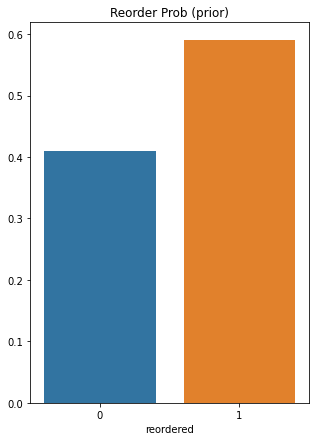

In [ ]:
# Reorder mean
plt.figure(figsize = (5,7))
sns.barplot(prior.groupby('reordered').order_id.count().index, prior.groupby('reordered').order_id.count().values/prior.shape[0])
plt.title('Reorder Prob (prior)')
plt.show()

Average reordered rate is close to 0.6. This might mean that most of the transactions belong to the usual customer than casual ones.

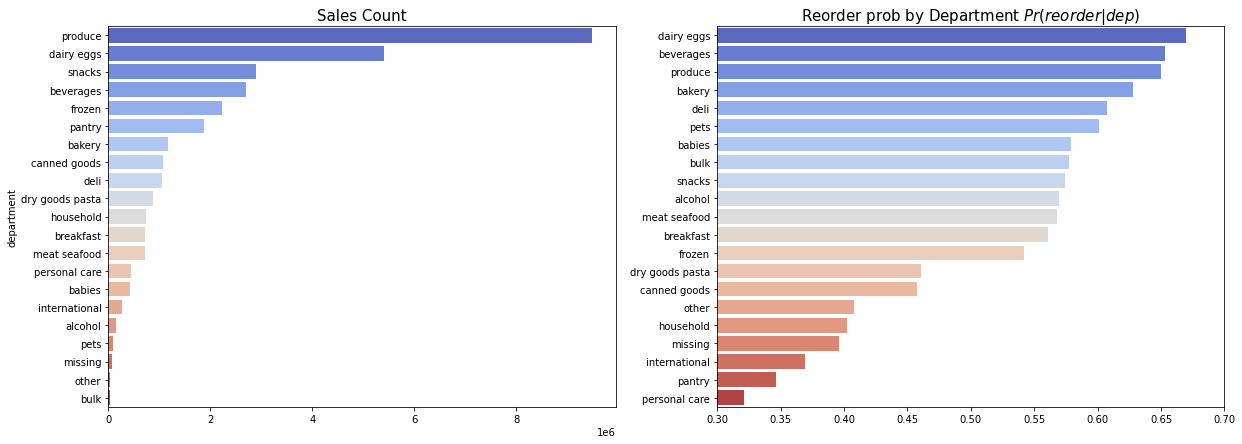

In [ ]:
# Aggregate Department Sales
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
# Group on department - aggregate sales count and mean reordered rate
dep_reorder = pd.DataFrame(prior.merge(products,on = 'product_id').groupby('department_id').reordered.agg(['count','mean']))
dep_reorder = dep_reorder.merge(departments, on = 'department_id').sort_values('count', ascending = False)

# Plot Sales Count by Department
palette=np.array(sns.color_palette("coolwarm", len(dep_reorder)))
sns.barplot(x = dep_reorder['count'], y = dep_reorder['department'], palette = palette)
plt.xlabel('')
plt.title('Sales Count', fontsize = 15)

# Plot Reorder Average by Department
plt.subplot(1,2,2)
sns.barplot(data = dep_reorder.sort_values('mean', ascending = False), x= 'mean', y= 'department', palette = palette)
plt.xlim([0.3,0.7])
plt.xlabel('')
plt.ylabel('')
plt.title('Reorder prob by Department $Pr(reorder|dep)$', fontsize = 15)
plt.show()

We can see that departments with perishable products or daily use products, such as dairy, bakery, produce, babies have the higest reorder probabiliity, while the departnebt with longer life such as pantry, household, personal care departments have lowest reorder rate.

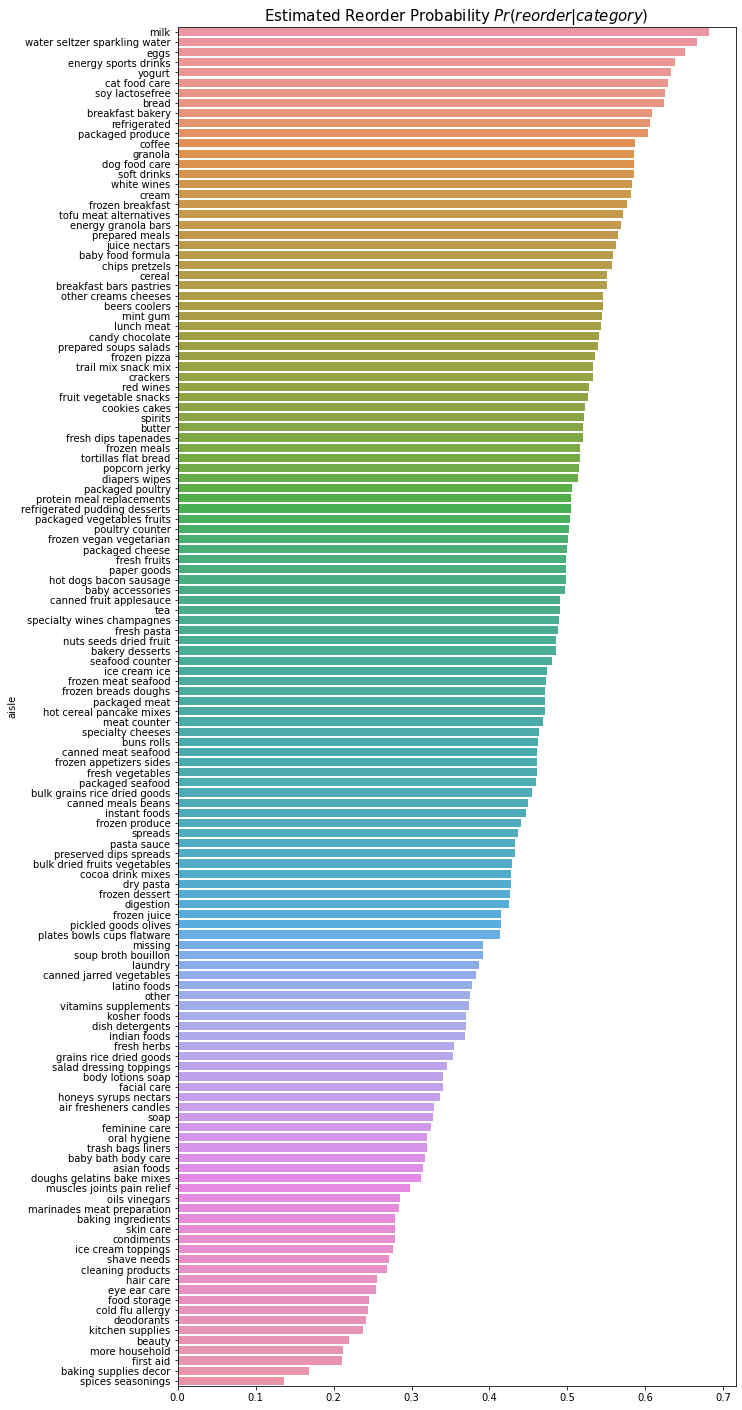

In [ ]:
# # Analyze Reorder (estimated) Probability by Prod and Category - Incremental Update
from tqdm import tqdm
reorder_stat = {prod_id:{'N':0, 'mean':0} for prod_id in products.product_id.unique()}  # initialize the dictionary of reorder probabilities
for row in tqdm(prior.values):  # iterate the prior order-product dataset and update the dictionary of reorder probabilities
  prod_id, reordered = row[1], row[-1]  # observe product id and reorder value
  try: 
    reorder_stat[prod_id]['N'] = reorder_stat[prod_id]['N'] + 1 # 
    reorder_stat[prod_id]['mean'] = reorder_stat[prod_id]['wmean'] + (reordered-reorder_stat[prod_id]['mean'])/reorder_stat[prod_id]['N']
  except: continue

# # Convert into dataframe
reorder_stats = pd.DataFrame({
    'product_id':[key for key in reorder_stat],
    'N':[reorder_stat[key]['N'] for key in reorder_stat],
    'reorder_prob':[reorder_stat[key]['mean'] for key in reorder_stat]})
reorder_stats.sort_values('reorder_prob', ascending = False, inplace = True)
reorder_stats = reorder_stats[reorder_stats.N>100].merge(products[['product_id','product_name', 'aisle_id']], on = 'product_id').\
                merge(aisles, on = 'aisle_id') # can ignore products with less than 100 observations - higher uncertainity

# Visualize the reorder probability by category
plt.figure(figsize = (10, 25))
reorder_probs = reorder_stats.groupby('aisle').reorder_prob.mean().sort_values(ascending = False)
sns.barplot(y=reorder_probs.index, x=reorder_probs.values)
plt.title('Estimated Reorder Probability $Pr(reorder|category)$', fontsize = 15)
plt.show()    
del reorder_stat
del reorder_probs

Similar to the department  reorder statistics, based on the above barplot, the products (aisles of products) with short lifecycle (perishable), such as fresh produce, milk, bread, diapers, have the higest reorder probabiliity, while the aisles/items with long term lifecycle such as hair products, skin care, spices have lowest reorder rate.

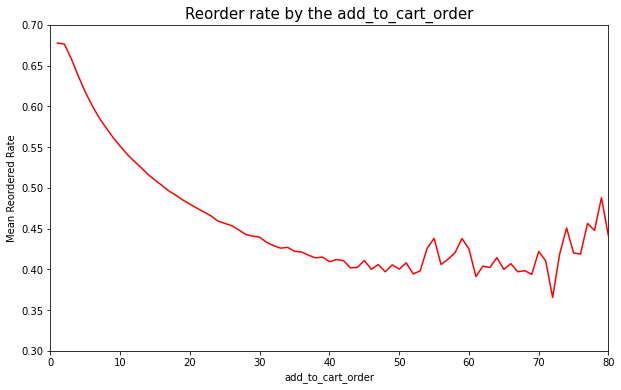

In [ ]:
# Plot the relationship between reordered rate and add_to_cart_order
reorder_order = prior.groupby('add_to_cart_order').reordered.mean()
plt.figure(figsize = (10,6))
sns.lineplot(reorder_order.index, reorder_order.values, color = 'red', alpha = 1)
plt.title('Reorder rate by the add_to_cart_order', fontsize = 15)
plt.ylim([0.3,0.7])
plt.xlim([0,80])
plt.ylabel('Mean Reordered Rate')
plt.show()

Not surprisingly, the products that are usually added earlier to the cart have more chance of being reordered. This may be due to the fact that people choose the essetial products first which are also likely to reordered.

# Purchase Habits

In [ ]:
# Create a dataframe for user purchase behaviours
customer_habits = orders.merge(prior.groupby('order_id').reordered.mean(), on = 'order_id')\
                            .groupby('user_id').reordered.agg(['count','mean'])\
                            .merge(orders.groupby('user_id')[['order_dow', 'order_hour_of_day', 'days_since_prior_order']].median(), on = 'user_id')\
                            .merge(orders.merge(pd.DataFrame(prior.groupby('order_id').add_to_cart_order.agg('count')), on = 'order_id')\
                                  .groupby('user_id').add_to_cart_order.median(), on='user_id').sort_values('add_to_cart_order', ascending = False)\
                                  .rename(columns = {'count':'order_count',
                                                    'mean':'reorder_rate', 
                                                    'order_hour_of_day':'usual_hour',
                                                    'order_dow':'usual_weekday',
                                                    'add_to_cart_order':'order_size' })
customer_habits.head(3)

,order_count,reorder_rate,usual_weekday,usual_hour,days_since_prior_order,order_size
user_id,,,,,,
190889,4,0.334207,3.0,17.0,6.0,73.5
58933,5,0.369388,0.0,14.5,7.0,67.0
95241,5,0.402461,3.5,14.5,8.0,65.0


## Pairwise Relationships between Customer habits

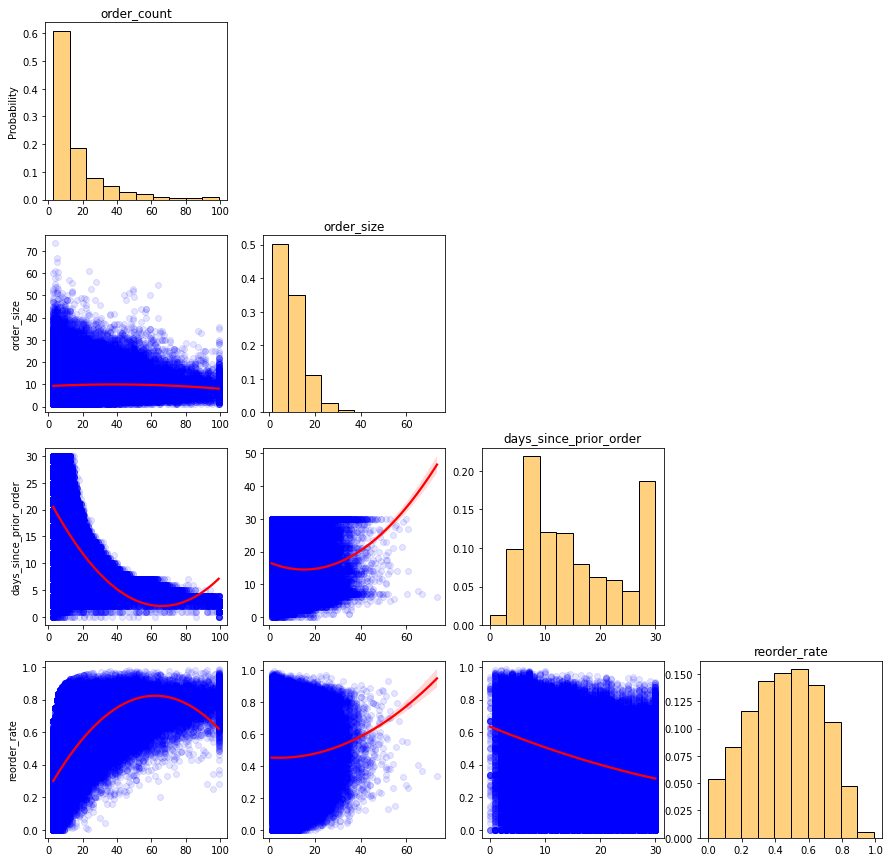

In [ ]:
columns = ['order_count', 'order_size', 'days_since_prior_order', 'reorder_rate']
n = len(columns)
plt.figure(figsize = (15,15))
for i, col_x in enumerate(columns):
  for j, col_y in enumerate(columns):
    if i<j: 
      plt.subplot(n,n,i*n+(j+1))
      plt.axis(False)
      continue
    plt.subplot(n,n, i*n+(j+1))
    if i==j:
      sns.histplot(customer_habits[col_x],stat = 'probability', color = 'orange', alpha = 0.5, bins = 10)
    else:
      # sns.scatterplot(data = customer_habits, y=col_x, x=col_y, )
      sns.regplot(data = customer_habits, y=col_x, x=col_y,
                  scatter_kws={"color": "blue", 'alpha':0.1},
                  line_kws={"color": "red", 'alpha':1},
                  order=2,
                  n_boot=200)
    if j>0: plt.ylabel('')
    if i==j: plt.title(f'{col_y}')
    plt.xlabel('')
plt.show()

The intuition behind pairwise relationships:

* More orders means less time between consequtive orders

* Larger order size means longer time till the next order (it lasts longer).

* Overall, order size and number of orders are skewed to the left, that is, there are some outliers who orders significantly more frequently, or orders  a significantly larger number of items per order. 
* Larger order size implies higher reorder rate (these may be the people who are mainly using instacart service for grocery shopping which depends on their diets)
* Less frequent (casual) users are using spontaneously, therefore they may have low reorder rate
* Furthermore, the distribution of "past days since the prior order" variable is multimodal, and we can see that big fraction of customers are casual customers who orders once a months. We can also see this from the sample statistics of this group:

In [ ]:
# Check customers whose average days between consecutive orders is larger than 30 (casuals?)
subset = customer_habits[customer_habits.days_since_prior_order>=30]
print(f'\t\t\tCasual or New Customers (days_since_prior_order >=30)\n')
subset.describe()

			Casual or New Customers (days_since_prior_order >=30)



,order_count,reorder_rate,usual_weekday,usual_hour,days_since_prior_order,order_size
count,29241.000000,29241.000000,29241.000000,29241.000000,29241.0,29241.000000
mean,4.824767,0.301343,2.656407,13.706337,30.0,8.931261
std,1.973353,0.182638,1.483423,2.704485,0.0,6.324928
min,3.000000,0.000000,0.000000,0.000000,30.0,1.000000
25%,3.000000,0.161905,1.500000,12.000000,30.0,4.000000
50%,4.000000,0.291667,2.500000,14.000000,30.0,8.000000
75%,6.000000,0.428571,4.000000,15.500000,30.0,12.000000
max,15.000000,0.909091,6.000000,23.000000,30.0,60.000000


## Relative Purchase/Visit Order for Department, Aisle, and Products


In [ ]:
# Relative add_to_cart order for products (aggregate on product level)
prior['relative_cart_order'] =  prior['add_to_cart_order']/prior.groupby('order_id').add_to_cart_order.transform('max')\
                                *(prior.groupby('order_id').add_to_cart_order.transform('max')>20) # ignore orders with small size
prod_order =  products.merge(prior[prior['relative_cart_order']>0]\
                                  .groupby('product_id').relative_cart_order.agg(['count', 'mean']),\
                              on='product_id')\
                      .sort_values(by = ['count', 'mean'], ascending = [False, False])\
                      .rename(columns = {'count':'sales', 'mean':'mean_relative_order'})
prod_order.head()

,product_id,product_name,aisle_id,department_id,sales,mean_relative_order
23459,24852,Banana,24,4,87902,0.284289
12417,13176,Bag of Organic Bananas,24,4,71618,0.306437
19959,21137,Organic Strawberries,24,4,62424,0.443777
20689,21903,Organic Baby Spinach,123,4,53730,0.470302
44483,47209,Organic Hass Avocado,24,4,51829,0.390543


In [ ]:
# Join the aisle and department tables with the table above
# Get relative purchase order of the frequently sold products (ignore the ones with less sales)
print(f'Number of products sold more than 250 times: {prod_order[prod_order.sales>250].shape[0]}')
frequent_prods = prod_order[prod_order.sales>250]\
                           .merge(aisles, on='aisle_id')\
                           .merge(departments, on='department_id')\
                           .sort_values('mean_relative_order', ascending = False)
frequent_prods.head()

Number of products sold more than 250 times: 5128


,product_id,product_name,aisle_id,department_id,sales,mean_relative_order,aisle,department
5087,33796,Sweet Orange Vanilla Honest Shampoo + Body Wash,25,11,339,0.702662,soap,personal care
3363,11610,Organic Chocolate Syrup,29,13,265,0.696613,honeys syrups nectars,pantry
3373,6860,Organic Balsamic Vinaigrette,89,13,460,0.693505,salad dressing toppings,pantry
4450,30327,Organic Ice Cream Cones,103,19,258,0.691661,ice cream toppings,snacks
3376,47740,Dijon Honey Mustard Dressing,89,13,381,0.689245,salad dressing toppings,pantry


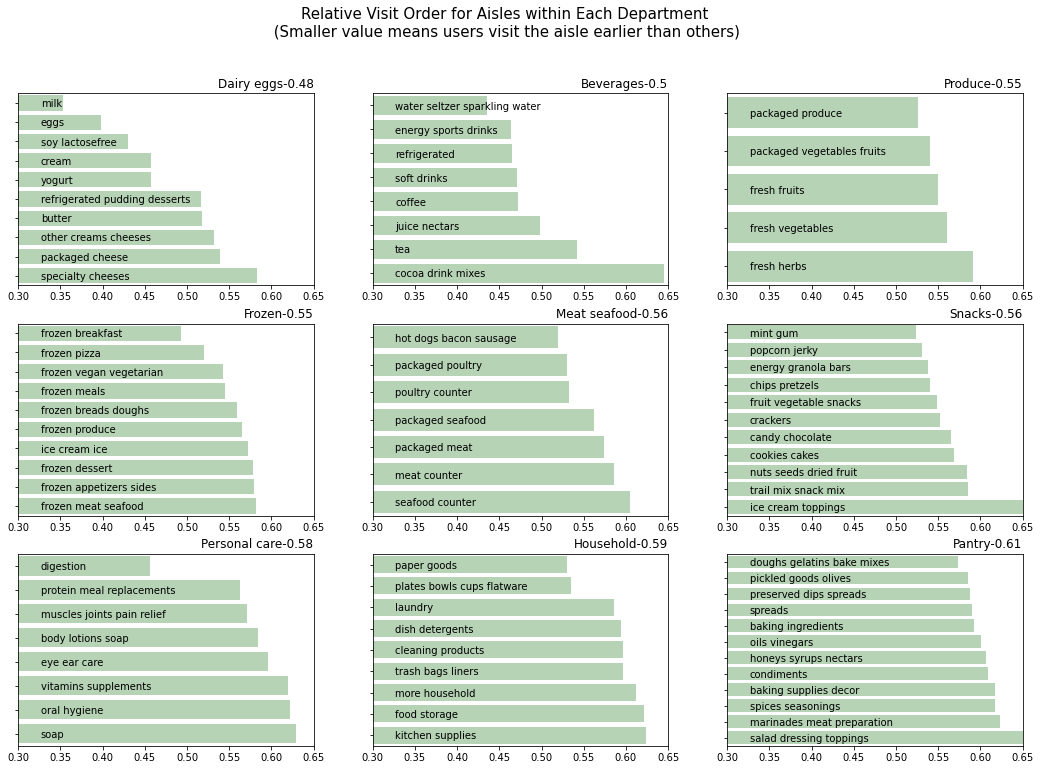

In [ ]:
# Plot the aggregate statistics for the relative "add to cart" order variables by aisles for each department
dep_order = pd.DataFrame(frequent_prods.groupby(['department','aisle']).mean_relative_order.median().sort_values(ascending = True)).reset_index()
plt.figure(figsize = (18,12))
cols = ['pantry', 'frozen', 'dairy eggs', 'snacks', 'personal care', 'household', 'beverages', 'produce', 'meat seafood']
sorted_cols = sorted(cols, key = lambda x: dep_order[dep_order.department == x].mean_relative_order.mean())
for i,department in enumerate(sorted_cols):
  plt.subplot(3,3,i+1)
  subset = dep_order[dep_order.department == department]
  ax = sns.barplot( x = subset['mean_relative_order'], y = subset['aisle'], alpha = 0.3, color = 'green' )
  ax.set_yticklabels(subset.aisle.unique(),x = 0.1, ha='left', minor = False,  )
  plt.xlim([0.3,0.65])
  plt.xlabel('')
  plt.ylabel('')
  plt.title(f'{department.capitalize()}-{round(subset.mean_relative_order.mean(),2)}', y = 1, x = 1, fontsize = 12, ha = 'right')
plt.suptitle('Relative Visit Order for Aisles within Each Department\n (Smaller value means users visit the aisle earlier than others)', fontsize = 15)
plt.show()

The plots show the relative add_to_cart_order (add_to_cart_order divided by the size(order)). This information may be used to improve the design and layout of departments/aisles to improve user experience and reduce time to order. Overall produce, dairy eggs, and beverages are the departments that are visited first by the users (users add their products to their carts first.).

## Product Choices by Hour of the Day

In [ ]:
prod_hours =  products.merge(prior.merge(orders[['order_id', 'order_hour_of_day']], on = 'order_id')\
                                  .groupby('product_id').order_hour_of_day.agg(['count','mean']),\
                              on = 'product_id')\
                      .query('count>25')\
                      .merge(departments, on = 'department_id')\
                      .merge(aisles, on = 'aisle_id')\
                      .rename(columns = {'count':'sales', 'mean':'average_hour'})\
                      .sort_values('average_hour', ascending = False)
prod_hours.head()

,product_id,product_name,aisle_id,department_id,sales,average_hour,department,aisle
5220,43910,Moist Supreme Sugar Free Classic Yellow Cake Mix,105,13,28,17.107143,pantry,doughs gelatins bake mixes
463,40383,Shortbread Triangles,61,19,34,17.058824,snacks,cookies cakes
10056,16252,Diet Pepsi Wild Cherry,77,7,45,17.044444,beverages,soft drinks
17546,20624,Medicated Powder,127,11,31,17.032258,personal care,body lotions soap
3950,44940,"Gum, Cinnamon, Slim Pack",46,19,26,16.923077,snacks,mint gum


In [ ]:
import plotly as pl
import plotly.express as px
import numpy as np
df = prod_hours.head(100)
fig = px.treemap(df, path=[ 'department', 'product_name'], values = 'sales',#px.Constant("world"),
                  color='department', hover_data=['average_hour'],
                  color_discrete_sequence = px.colors.sequential.Redor_r,
                 title = '100 products with highest mean order hours')
fig.update_layout(uniformtext=dict(minsize=15),
                  margin = dict(t=50, l=25, r=25, b=25))
fig.show()

df = prod_hours.iloc[prod_hours.shape[0]//2-50:prod_hours.shape[0]//2+50,:]
fig = px.treemap(df, path=[ 'department', 'product_name'], values='sales',#px.Constant("world"),
                  color='department', hover_data=['average_hour'],
                  color_discrete_sequence = px.colors.sequential.Mint_r,                 
                 title = '100 products with average mean order hours')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Based on the above tree diagrams, we can see that people are more likely to buy unhealthy food choices in later hours of a day (or people who shop in late hours are more likely to choose unhealthy options, while people who shops during early morning or afternoon are more likely to get fresh produce, organic products.)

## Individual User Purchase Habits
Product associaciation rules for a single user.

In [ ]:
import random 
# Select a user
user = random.choice(orders.loc[orders.groupby('user_id').order_id.transform('count')>50,:].user_id.values)
print(f'Selected user: {user}')
# Create a order-items pair dataset
orders_selected = orders[orders.user_id==user]
order_items = prior.merge(orders_selected, on = 'order_id')[['user_id','order_id','product_id']]
item_list = pd.DataFrame(order_items.groupby('order_id').product_id.apply(list)).rename(columns = {'product_id':'items'})

# Create item pair frequency dictionary from user transactions
n_transactions = len(item_list)
user_freqs = {}
for items in item_list['items'].values:
  for i,item in enumerate(items):
    if item not in user_freqs: user_freqs[item] = 1
    else: user_freqs[item]+=1
    for j,item_j in enumerate(items[i:]):
        pair = tuple((item,item_j))
        user_freqs[pair]=user_freqs.get(pair,0)+1

# Create a dictionary for association rules        
rules = {'item_pair':[], 'left':[], 'right':[],
         'support_l':[], 'support_r':[], 'support':[],
         'confidence_l_r':[], 'confidence_r_l':[], 
         'lift':[]}

# Iterate over the item pairs and compute association rules (like apriori)
for pair in user_freqs:
    try:
      left, right = pair[0], pair[1]
      if left!=right and user_freqs[pair]>5:
        support_lr = user_freqs[pair]/n_transactions  # probabilty of buying both items
        support_l = user_freqs[left]/n_transactions   # probability of buying first one
        support_r = user_freqs[right]/n_transactions  # probability of buying second one
        rules['item_pair'].append(pair)
        rules['left'].append(left)
        rules['right'].append(right)
        rules['support_l'].append(support_l)
        rules['support_r'].append(support_r)
        rules['support'].append(support_lr)         
        rules['confidence_l_r'].append(support_lr / support_l)  # probability of buying second given user bought/added the first item to the cart - pr(r|l)
        rules['confidence_r_l'].append(support_lr / support_r)  # probability of buying first given user bought/added the second item to the cart - pr(l|r) 
        # lift: a value greater than 1 indicates that the two items are positively correlated with each other and tend to occur together more often than expected.
        rules['lift'].append(support_lr / (support_l * support_r)) 
    except: continue
    
rules = pd.DataFrame(rules)
rules = rules.merge(products[['product_id','product_name']], left_on='left', right_on='product_id')\
       .merge(products[['product_id','product_name']], left_on='right', right_on='product_id', suffixes=('_l', '_r'),)\
       .drop(columns = ['product_id_l','product_id_r']).sort_values('support', ascending = False)
rules.head(6)

Selected user: 144304


,item_pair,left,right,support_l,support_r,support,confidence_l_r,confidence_r_l,lift,product_name_l,product_name_r
35,"(27845, 18288)",27845,18288,0.847826,0.663043,0.565217,0.666667,0.852459,1.005464,Organic Whole Milk,Sea Salt Potato Chips
140,"(27845, 5337)",27845,5337,0.847826,0.793478,0.543478,0.641026,0.684932,0.807868,Organic Whole Milk,Monterey Jack Cheese
34,"(5337, 18288)",5337,18288,0.793478,0.663043,0.467391,0.589041,0.704918,0.888390,Monterey Jack Cheese,Sea Salt Potato Chips
19,"(5337, 22395)",5337,22395,0.793478,0.489130,0.434783,0.547945,0.888889,1.120244,Monterey Jack Cheese,Tomato Sauce
20,"(27845, 22395)",27845,22395,0.847826,0.489130,0.434783,0.512821,0.888889,1.048433,Organic Whole Milk,Tomato Sauce
4,"(5337, 44449)",5337,44449,0.793478,0.369565,0.336957,0.424658,0.911765,1.149073,Monterey Jack Cheese,Organic Tomato Sauce


Interpretation of outputs:

Each row represents association rules between a pair of items (left and right (l,r)).
* Support (_l,_r, or both): Support measures the frequency of occurrence of an itemset in the dataset. It tells us how popular a particular itemset is among all the transactions in the dataset. A high support value indicates that the itemset occurs frequently in the dataset and is therefore considered important. A low support value indicates that the itemset occurs infrequently and may not be as significant. In the context of association rule mining, we typically set a minimum support threshold to filter out infrequent itemsets and reduce the search space.
* Confidence is another measure used in association rule mining. It measures how often the rule is correct. The confidence of a rule A -> B is the proportion of transactions that contain A and also contain B.

  **Confidence(A -> B) = support(A ∪ B) / support(A)**

  For example, if a rule has a confidence of 0.8, it means that in 80% of the transactions that contain A, B is also present. A high confidence indicates a strong association between A and B, and suggests that if A is present in a transaction, there is a high likelihood that B will also be present.
* Lift - Lift is a measure of how much more often two items occur together than we would expect if they were statistically independent. A lift value of 1 indicates that the two items are independent of each other. A value greater than 1 indicates that the two items are positively correlated with each other and tend to occur together more often than expected. A value less than 1 indicates that the two items are negatively correlated and tend to occur together less often than expected.

  **lift(A -> B) = support(A -> B) / (support(A) * support(B))**

# Basket Analysis: How Items are Associated to each other in general?
Association rules are not commonly used for analysis of individual user purchase habits since a single user does not usually have enough transactions for us to learn the association rules. If we want to do this for the whole order transactions, we need to use a more efficient algorithm such as FP-Growth using Spark or MLxtend. The complexity of FP-Growth algorithm is $O(N^2)$ where $N$ is the number of transactions, hence it may be a good idea to reduce the number of transactions by  filtering out the small orders and infrequent products.

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# Filter out infrequent items
min_order_size = 50 # not a good idea but helps with the memory constraints
min_item_freq = prior.shape[0]/10000 # this is equivalent to setting min_support parameter of fpgrowth algorithm
index_ord = prior.groupby('order_id').product_id.transform('count')>min_order_size # filter for small orders
index_prod = prior.groupby('product_id').order_id.transform('count')>min_item_freq # filter for infrequent products
df_transactions = prior.loc[index_ord * index_prod,:].merge(products, on = 'product_id') # apply filters


In [ ]:
# Transform data to basket format
df_baskets = pd.crosstab(df_transactions['order_id'], df_transactions['product_name'])

# Perform frequent itemset mining with FP-growth
frequent_itemsets = fpgrowth(df_baskets, min_support=0.01, max_len=2, use_colnames=True) # limit length of itemset to 2

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.7)

In [ ]:
# View first 5 itemsets with highest lift
rules.sort_values('confidence', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5066,(Hass Avocado Bag),(Banana),0.013632,0.314833,0.011360,0.833333,2.646907,0.007068,4.111003
5227,(Total 0% Peach Yogurt),(Total 0% Raspberry Yogurt),0.012983,0.031159,0.010711,0.825000,26.477344,0.010306,5.536236
5128,(Almond Milk Blueberry Yogurt),(Almond Milk Strawberry Yogurt),0.015255,0.017202,0.012334,0.808511,47.000401,0.012071,5.132388
1442,(English Muffins),(Banana),0.013307,0.314833,0.010711,0.804878,2.556525,0.006521,3.511482
5291,(Mango Yoghurt),(Lemon Yogurt),0.015579,0.030510,0.012334,0.791667,25.948138,0.011858,4.653554
3676,"(Kombucha, Organic Raw, Citrus)",(Organic Raw Kombucha Gingerade),0.018825,0.056151,0.014281,0.758621,13.510464,0.013224,3.910233
5292,(Mango Yoghurt),(Honey Yoghurt),0.015579,0.032132,0.011685,0.750000,23.340909,0.011184,3.871470
5228,(Vitamin D Organic Whole Milk),(Banana),0.017202,0.314833,0.012658,0.735849,2.337269,0.007242,2.593847
3524,(Lemon Ginger Sparkling Probiotic Drink),(Bag of Organic Bananas),0.016228,0.305096,0.011685,0.720000,2.359915,0.006733,2.481801
2236,(Bosc Pear),(Banana),0.014930,0.314833,0.010711,0.717391,2.278642,0.006010,2.424438


Conviction: The conviction measures the degree of dependence of the consequent on the antecedent. It is calculated as (1 - support(consequent)) / (1 - confidence(rule)), where support(consequent) is the support of the consequent and confidence(rule) is the confidence of the rule. Conviction values range from 0 to infinity, where a value of 1 indicates independence between the antecedent and consequent. Higher conviction values indicate stronger dependence between the antecedent and consequent.

In [ ]:
# Make predictions for a new basket of items
new_basket = ['Hass Avocado Bag', 'Organic Whole Milk', 'Mango Yoghurt','Banana']
predicted_items = rules[                                                                     # select associated itemsets based on tbe new basket:
                        (rules.antecedents.apply(lambda x: set(x).issubset(new_basket)))\    # if antecedent is in the basket
                        &(rules.lift>2)\                                                     # if lift>1 => high correlation
                        &(rules.conviction>1)                                                # if confidence>1 => positive dependence
                        ]  
print('\nPredicted Items for Basket {}:\n'.format(new_basket))

# Print the names of products that has high correlation with the current items in the basket
for itemset in predicted_items['consequents']:
   if list(itemset)[0] not in new_basket: 
     print(''.join(itemset))


Predicted Items for Basket ['Hass Avocado Bag', 'Organic Whole Milk', 'Mango Yoghurt', 'Banana']:

Organic Tomato Cluster
Organic Whole String Cheese
Whipped Cream Cheese
English Muffins
Half & Half
Broccoli Crown
Original Cream Cheese
Kiwi
Bosc Pear
1% Low Fat Milk
Vitamin D Organic Whole Milk
Lemon Yogurt
Honey Yoghurt
Blueberry Yoghurt


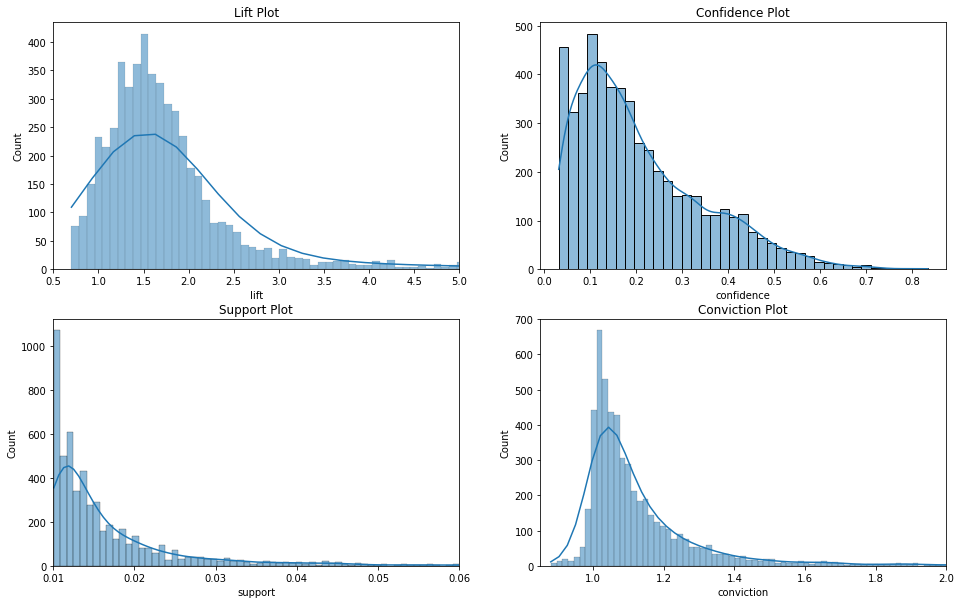

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

# Lift plot
plt.subplot(2,2,1)
sns.histplot(data=rules, x="lift", kde=True)
plt.xlim([0.5,5])
plt.title("Lift Plot")

# Confidence plot
plt.subplot(2,2,2)
sns.histplot(data=rules, x="confidence", kde=True)
plt.title("Confidence Plot")

# Support plot
plt.subplot(2,2,3)
sns.histplot(data=rules, x="support", kde=True)
plt.xlim([0.01,0.06])
plt.title("Support Plot")

# Conviction plot
plt.subplot(2,2,4)
sns.histplot(data=rules, x="conviction", kde=True)
plt.xlim([0.85,2])
plt.title("Conviction Plot")

plt.show()


Since we have a large dataset with millions of transactions and thousands of products, the the itemsets is a very small fraction of the number of total transactions. Therefore, we can see that the support value is more concentrated on values close to 1-2 percent. 

However, based on the lift and conviction plots, there are many products whose sales are highly correlated or dependent. Using these values, we can bundle products and create special discounts for bundled products to improve their sales.

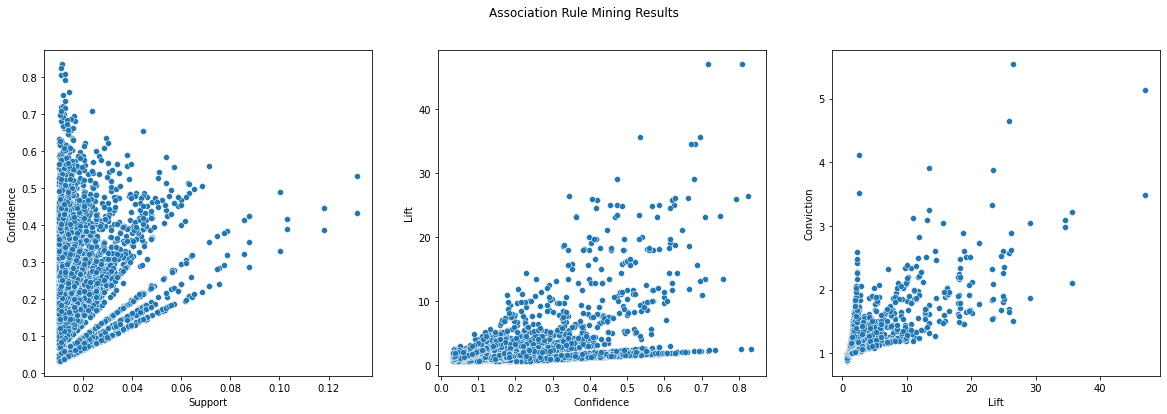

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,6))
# Support vs. Confidence scatter plot
plt.subplot(1,3,1)
sns.scatterplot(data=rules, x="support", y="confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")

# Confidencec vs. Lift scatter plot
plt.subplot(1,3,2)
sns.scatterplot(data=rules, x="confidence", y="lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")

# Lift vs. Conviction scatter plot
plt.subplot(1,3,3)
sns.scatterplot(data=rules, x="lift", y="conviction")
plt.xlabel("Lift")
plt.ylabel("Conviction")

plt.suptitle("Association Rule Mining Results")
plt.show()


# Cusomer Segmentation

 ## Aisle/Product Category Level Preferences

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

aisles = pd.read_csv('aisles.csv')
prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')

In [ ]:
# Create a pivot table with index as users, columns as aisles, values as the number of items bought from the aisle.
cust_prod = prior.merge(orders,on= 'order_id')\
                 .merge(products, on = 'product_id')\
                 .merge(aisles,on='aisle_id')[['user_id','aisle']]
cust_prod = pd.crosstab(cust_prod['user_id'], cust_prod['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [ ]:
# Reduce the dimensionality of dataframe
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
n_clusters = 5
scaler = RobustScaler(quantile_range=(0,90))
pca = PCA(n_components=5)
reduced_df = pd.DataFrame(pca.fit_transform(scaler.fit_transform(cust_prod)))
reduced_df.head(3)

,0,1,2,3,4
0,-2.160364,-1.832782,0.232940,-0.371984,-0.093177
1,-1.766403,1.041523,-0.977605,1.547928,0.108393
2,-2.123474,-2.128040,0.109674,0.187987,-0.236983


In [ ]:
# Clustering with K-means
from sklearn.cluster import KMeans
cluster_input = (np.log(np.abs(reduced_df))* ((reduced_df*(-1))/np.abs(reduced_df))) # I used log transform to reduce impact of large values / to make clusters even
kmeans = KMeans(n_clusters = 6)
reduced_df['label'] = kmeans.fit_predict(cluster_input)
reduced_df.head(3)

,0,1,2,3,4,label
0,-2.160364,-1.832782,0.232940,-0.371984,-0.093177,0
1,-1.766403,1.041523,-0.977605,1.547928,0.108393,5
2,-2.123474,-2.128040,0.109674,0.187987,-0.236983,4


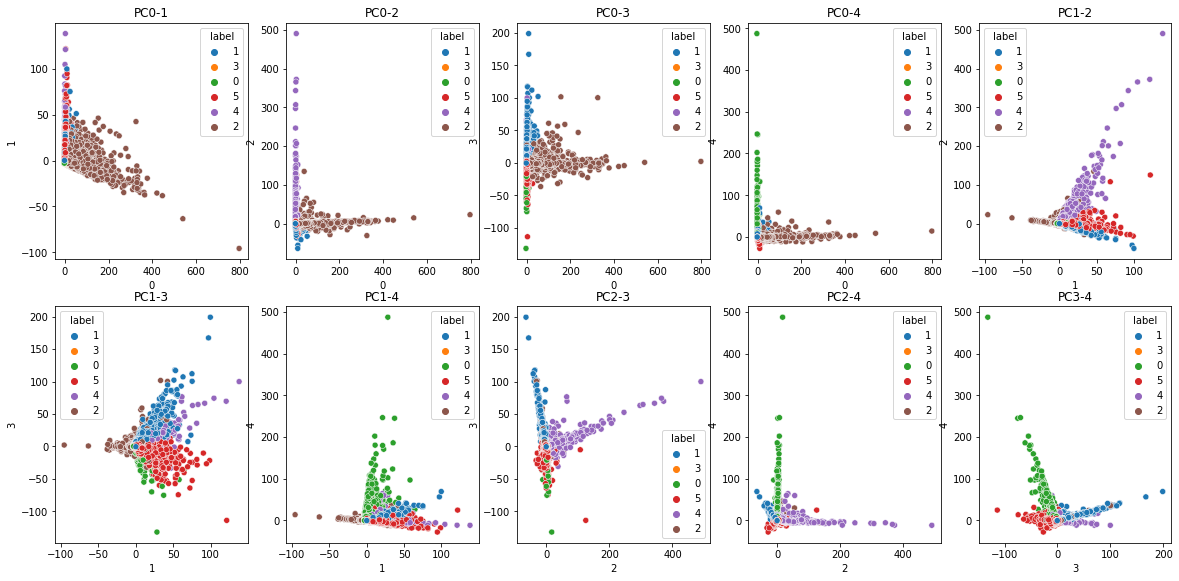

In [ ]:
# Visually check if the groups are well seperated using Principal Components
plt.figure(figsize=(20,20))
x=1
for i in range(4):
  for j in range(i+1,5):
    plt.subplot(4,5,x)
    sns.scatterplot(reduced_df.iloc[:,i],reduced_df.iloc[:,j], hue = reduced_df.iloc[:,-1].astype('str'))
    plt.title(f'PC{i}-{j}')
    x+=1
plt.show()

In [ ]:
# Save cluster labels
user_label = pd.DataFrame(index = cust_prod.index )
user_label['label'] = kmeans.labels_
user_label[['pc_'+str(i) for i in range(1,6)]] = reduced_df.iloc[:,:5].values
user_label.reset_index(inplace = True)
user_label.to_csv('user_labels.csv',index = False)

In [ ]:
# Department sales distribution by customer groups
user_label = pd.read_csv('user_labels.csv')
orders = orders.merge(user_label, on = 'user_id')
prior_1 = orders.merge(prior, on = 'order_id')[['label', 'product_id']]
prior_1 = prior_1.merge(products, on = 'product_id')[['label','department_id']]\
        .merge(departments, on = 'department_id')
user_dep = pd.DataFrame(prior_1.groupby(['label','department']).department_id.count()).reset_index()
dep_pivoted = user_dep.pivot_table(values='department_id', index='department', columns='label', fill_value=0)
dep_pivoted = dep_pivoted/dep_pivoted.sum(axis = 1).values[:,None]

In [ ]:
# Visualizing the DataFrame modified styling based on segments' share of purchases from aisles.
cm = sns.light_palette("green",25, as_cmap = True)
print("\nModified Stlying DataFrame:")
dep_pivoted.style.background_gradient(cmap=cm, axis=1).set_precision(2)\
            .highlight_max(axis=1, color='blue')\
            .highlight_min(axis=1, color='red')



Modified Stlying DataFrame:


label,0,1,2,3,4,5
department,,,,,,
alcohol,0.51,0.13,0.03,0.02,0.12,0.19
babies,0.04,0.04,0.79,0.02,0.04,0.07
bakery,0.09,0.12,0.14,0.02,0.19,0.44
beverages,0.10,0.12,0.10,0.04,0.19,0.45
breakfast,0.08,0.12,0.13,0.02,0.18,0.46
bulk,0.10,0.16,0.13,0.02,0.19,0.40
canned goods,0.11,0.14,0.13,0.02,0.20,0.39
dairy eggs,0.10,0.12,0.15,0.02,0.19,0.41
deli,0.09,0.17,0.13,0.02,0.19,0.41


In [ ]:
# Calculate cluster purchase habits: mean or median (weekday, hour of the day, frequency, Population fraction (size), reorder rate)
user_id_stats = orders.groupby('user_id')[['order_dow', 'order_hour_of_day', 'days_since_prior_order']].median()
user_id_stats['label'] = kmeans.labels_
cluster_stats = user_id_stats[['order_dow', 'order_hour_of_day', 'days_since_prior_order','label']].groupby('label').median()
cluster_stats['size'] = pd.DataFrame(reduced_df.label.value_counts()/reduced_df.shape[0]).sort_index().rename(columns={'label':'size'})
cluster_stats['reorder_rate'] = pd.DataFrame(prior.merge(orders, on = 'order_id').groupby('label').reordered.mean())
cluster_stats

,order_dow,order_hour_of_day,days_since_prior_order,size,reorder_rate
label,,,,,
0,2.5,14.0,17.0,0.298270,0.402879
1,3.0,13.5,14.0,0.161264,0.545889
2,3.0,13.5,7.0,0.050439,0.680996
3,3.0,13.5,20.0,0.115892,0.387406
4,2.5,14.0,12.0,0.207547,0.518722
5,3.0,13.0,7.5,0.166588,0.668316


* Cluster 3 makes up 12 percent of all customers but has the smallest (2-3%) share of the sales for all aisles (this is based on quantity not revenues). This group may be casual users that uses the service when there is a discount or promotion  🦹). They make one order in 20 days on average. They have the lowest reorder rate among all groups (38%).

* Cluster 5 makes up 16 percent of all customers, but they account for almost half of the sales in all aisles except babies, alcohol, and pets. They make one order per week on average. This group may be using the service as their main method of household shopping for a big family. Therefore, the reorder rate is also very high for this group (67%).

* Cluster 2 account for 80% of sales from babies aisle but makes up only 5% of all customers. They are also making weekly orders on average. They have the highest reorder rate (68%) among all groups.

* Cluster 0: Largest group (30% of all customers) and accounts for 50% of alcohol sales. For all other aisles (except babies and pets), they account for about 10% of sales.

* Cluster 4: Second largest cluster (20% of customer population) accounts for 60% of sales from the pets aisle, and around 20% of sales from other aisles (except babies).

In [ ]:
# Check if we can group certain clusters based on their similarities
dep_pivoted.corr()

label,0,1,2,3,4,5
label,,,,,,
0,1.000000,0.172535,-0.296621,-0.177019,-0.248281,-0.302276
1,0.172535,1.000000,-0.591318,0.271344,-0.249600,0.660542
2,-0.296621,-0.591318,1.000000,-0.064468,-0.452213,-0.636236
3,-0.177019,0.271344,-0.064468,1.000000,-0.162705,0.255348
4,-0.248281,-0.249600,-0.452213,-0.162705,1.000000,0.056994
5,-0.302276,0.660542,-0.636236,0.255348,0.056994,1.000000


The clusters are not very similar to each other based on correlation values except cluster 1 and 5. The main differences are that cluster 1 makes less frequent orders (once in two weeks on average) and accounts for significantly smaller fraction of sales even though they are similar to cluster 5 in size. They also have  relatively high average reorder rate.

# Product Level Preferences - Predicting Reordered Products for the Next Purchase



## Prepare Data

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')

In [ ]:
# Create user-product features
user_product_grouped = prior.merge(orders, on='order_id')\
                            .groupby(['user_id', 'product_id']).agg({'order_id':'count', 
                                                                     'add_to_cart_order':'mean',
                                                                      'reordered': 'mean'})\
                            .rename(columns = {'order_id':'p_order_count',
                                               'add_to_cart_order':'median_cart_order',
                                               'reordered':'reordered_rate'}).reset_index()
user_product_grouped.head(3)

,user_id,product_id,p_order_count,median_cart_order,reordered_rate
0,1,196,10,1.400000,0.900000
1,1,10258,9,3.333333,0.888889
2,1,10326,1,5.000000,0.000000


In [ ]:
from tqdm import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

# Get the mean and std of days between orders of products by users
orders['days_cumsum'] = orders.groupby('user_id').days_since_prior_order.transform('cumsum')
product_mean_freq = prior.merge(orders, on = 'order_id')\
                         .groupby(['user_id', 'product_id'])\
                         .days_cumsum.apply(list).reset_index()
product_mean_freq.loc[:,'mean_freq'] = 0
product_mean_freq.loc[:,'std_freq'] = 0
for i in tqdm(range(product_mean_freq.shape[0])):
  vals = np.diff(sorted(product_mean_freq.iloc[i,2]))
  product_mean_freq.iloc[i,3] = np.nanmean(vals)  
  product_mean_freq.iloc[i,4] = np.nanstd(vals)
product_mean_freq[['user_id','product_id', 'mean_freq', 'std_freq']].to_csv('product_mean_freq.csv', index = False)
product_mean_freq[['user_id','product_id', 'mean_freq', 'std_freq']].head()

,user_id,product_id,mean_freq,std_freq
0,1,196,23.000,5.606119
1,1,10258,20.125,9.239014
2,1,10326,NaN,NaN
3,1,12427,23.000,5.606119
4,1,13032,80.500,36.500000


In [ ]:
# Find the the number of days passed since the day user ordered a product
last_order = prior.merge(orders, on = 'order_id')\
             .groupby(['user_id','product_id']).agg({'days_cumsum':'max'})\
             .rename(columns = {'days_cumsum':'product_last_order'}).reset_index()
user_last_order = orders.groupby('user_id').days_cumsum.max().reset_index()
user_last_order.rename(columns = {'days_cumsum':'user_last_order'}, inplace = True)
last_order = last_order.merge(user_last_order, on = 'user_id')
last_order['days_since_last_order'] = last_order['user_last_order']-last_order['product_last_order']
# Save the dataframe to csv file
last_order[['user_id','product_id','days_since_last_order']].to_csv('last_order.csv', index = False)
last_order[['user_id','product_id','days_since_last_order']].head()

,user_id,product_id,days_since_last_order
0,1,196,14.0
1,1,10258,14.0
2,1,10326,97.0
3,1,12427,14.0
4,1,13032,14.0


In [ ]:
# Recreate General user habits dataset
customer_habits = orders.merge(prior.groupby('order_id').reordered.mean(), on = 'order_id')\
                            .groupby('user_id').reordered.agg(['count','mean'])\
                            .merge(orders.groupby('user_id')[['order_dow', 'order_hour_of_day', 'days_since_prior_order']].median(), on = 'user_id')\
                            .merge(orders.merge(pd.DataFrame(prior.groupby('order_id').add_to_cart_order.agg('count')), on = 'order_id')\
                                  .groupby('user_id').add_to_cart_order.median(), on='user_id')\
                                  .rename(columns = {'count':'user_order_count',
                                                    'mean':'user_reordered_rate', 
                                                    'days_since_prior_order':'user_mean_freq',
                                                    'order_hour_of_day':'user_usual_hour',
                                                    'order_dow':'user_usual_weekday',
                                                    'add_to_cart_order':'user_mean_order_size' })
customer_habits.head(3)

,user_order_count,user_reordered_rate,user_usual_weekday,user_usual_hour,user_mean_freq,user_mean_order_size
user_id,,,,,,
1,10,0.705833,3.0,8.0,19.5,5.5
2,14,0.447961,2.0,10.0,13.0,13.5
3,12,0.658817,1.0,16.0,11.0,7.0


In [ ]:
# Combine the above dataframes into user_product dataframe
product_mean_freq = pd.read_csv('product_mean_freq.csv')
last_order = pd.read_csv('last_order.csv')
user_product = product_mean_freq\
              .merge(last_order, on = ['user_id', 'product_id'])\
              .merge(user_product_grouped, on = ['user_id', 'product_id'])\
              .merge(customer_habits.reset_index(), on = 'user_id')
user_product.to_csv('user_product_stats.csv', index = False)
user_product.head()

,user_id,product_id,mean_freq,std_freq,days_since_last_order,p_order_count,median_cart_order,reordered_rate,user_order_count,user_reordered_rate,user_usual_weekday,user_usual_hour,user_mean_freq,user_mean_order_size
0,1,196,23.000,5.606119,14.0,10,1.400000,0.900000,10,0.705833,3.0,8.0,19.5,5.5
1,1,10258,20.125,9.239014,14.0,9,3.333333,0.888889,10,0.705833,3.0,8.0,19.5,5.5
2,1,10326,NaN,NaN,97.0,1,5.000000,0.000000,10,0.705833,3.0,8.0,19.5,5.5
3,1,12427,23.000,5.606119,14.0,10,3.300000,0.900000,10,0.705833,3.0,8.0,19.5,5.5
4,1,13032,80.500,36.500000,14.0,3,6.333333,0.666667,10,0.705833,3.0,8.0,19.5,5.5


Following are the descriptions of aggregated user-product and user level statistics:
* mean_freq and std_freq: mean and standard deviation of the number of days between consequtive orders of the product by the user

* days_since_last_order: the number of days passed since since the last purchase of the product by user

* p_order_count: the number of times the user bouth the porduct

* median_cart_order: median value of the order of adding the product to cart by the user

* reordered_rate: this one is redundant since it can be calculated as (p_order_count-1)/p_order_count

* user_order_count, user_reordered_rate, user_usual_weekday, user_usual_hour: these represent count of all orders, median size of orders, median values of order day of the week and hour of the day for the user.

* user_mean_freq - average number of days between orders of the user

## Predict Reordered Items for the last order

In [ ]:
import pandas as pd
# ! unzip order_products__train.csv.zip
train = pd.read_csv('order_products__train.csv') # last orders of users in the train set
orders = pd.read_csv('orders.csv')
user_product_stats = pd.read_csv('user_product_stats.csv')
products = pd.read_csv('products.csv')
user_labels = pd.read_csv('user_labels.csv')

In [ ]:
# Create training 
train_last = user_product_stats.merge(orders[orders.eval_set == 'train'][['user_id','order_id','order_dow', 'order_hour_of_day', 'days_since_prior_order']], on = 'user_id')\
                         .merge(train[train.reordered == 1][['order_id', 'product_id','reordered']], on = ['order_id', 'product_id'], how = 'left')\
                         .merge(products[['product_id','aisle_id','department_id']], on = 'product_id')\
                         .merge(user_labels, on = 'user_id')
train_last.head(3)

,user_id,product_id,mean_freq,std_freq,days_since_last_order,p_order_count,median_cart_order,reordered_rate,user_order_count,user_reordered_rate,...,days_since_prior_order,reordered,aisle_id,department_id,label,pc_1,pc_2,pc_3,pc_4,pc_5
0,1,196,23.000,5.606119,14.0,10,1.400000,0.900000,10,0.705833,...,14.0,1.0,77,7,0,-2.160364,-1.832782,0.23294,-0.371984,-0.093177
1,1,10258,20.125,9.239014,14.0,9,3.333333,0.888889,10,0.705833,...,14.0,1.0,117,19,0,-2.160364,-1.832782,0.23294,-0.371984,-0.093177
2,1,10326,NaN,NaN,97.0,1,5.000000,0.000000,10,0.705833,...,14.0,NaN,24,4,0,-2.160364,-1.832782,0.23294,-0.371984,-0.093177


In [ ]:
# NaN values in the reordered column means the product has not been reordered in the last order
train_last['reordered'] = train_last['reordered'].fillna(value = 0)
# Get the fraction of negative and positive labels
train_last['reordered'].value_counts()/train_last.shape[0]

0.0    0.9022
1.0    0.0978
Name: reordered, dtype: float64

In [ ]:
import gc
del aisles
del cluster_input
del prior
del scaler
del reduced_df
del user_label
del user_labels
del user_product_stats
del cust_prod
del orders
del train
gc.collect()

90

### Final Exploration and Feature Engineering

Here, we create new features or use the existing features to check differences between reordered and not-reordered purchases using common statistics of the features.

In [ ]:
train_last.groupby('reordered').agg({'reordered_rate':'mean',
                                     'user_order_count':'mean',
                                     'p_order_count':'mean',
                                     'mean_freq':'mean',
                                     'days_since_last_order':'mean'})

,reordered_rate,user_order_count,p_order_count,mean_freq,days_since_last_order
reordered,,,,,
0.0,0.237769,26.066741,2.145480,44.391494,100.645732
1.0,0.521377,19.138224,5.113273,31.167908,39.618745


In [ ]:
train_last.groupby('reordered').reordered_rate.describe()

,count,mean,std,min,25%,50%,75%,max
reordered,,,,,,,,
0.0,7645837.0,0.237769,0.325775,0.0,0.0,0.000000,0.500000,0.989247
1.0,828824.0,0.521377,0.358536,0.0,0.0,0.666667,0.833333,0.989899


In [ ]:
x = train_last.copy()
x['normalized_days_since_prior_order'] = (x['days_since_prior_order']-x['mean_freq'])/(x['std_freq']+1)
x.groupby('reordered').normalized_days_since_prior_order.describe()

,count,mean,std,min,25%,50%,75%,max
reordered,,,,,,,,
0.0,2558089.0,-19.038143,44.051843,-363.0,-16.000000,-1.363636,-0.560246,30.0
1.0,547717.0,-7.155203,26.459252,-352.0,-1.740841,-0.761205,0.000000,30.0


In [ ]:
x = train_last.copy()
x['days_remaining'] = x['mean_freq']-x['days_since_prior_order']
x.groupby('reordered').days_remaining.describe()

,count,mean,std,min,25%,50%,75%,max
reordered,,,,,,,,
0.0,2558089.0,31.869537,45.369575,-30.0,4.333333,18.666667,44.0,363.0
1.0,547717.0,16.454216,30.661326,-30.0,0.000000,8.666667,23.0,352.0


In [ ]:
x = train_last.copy()
x['order_ratio'] = x['p_order_count']/x['user_order_count']
x.groupby('reordered').order_ratio.describe()

,count,mean,std,min,25%,50%,75%,max
reordered,,,,,,,,
0.0,7645837.0,0.134456,0.137771,0.010101,0.041667,0.086957,0.174603,1.0
1.0,828824.0,0.334041,0.255775,0.010101,0.125000,0.250000,0.500000,1.0


In [ ]:
x = train_last.copy()
x['relative_order'] = x['median_cart_order']/x['user_mean_order_size']
x.groupby('reordered').relative_order.describe()

,count,mean,std,min,25%,50%,75%,max
reordered,,,,,,,,
0.0,7645837.0,0.837051,0.620857,0.014925,0.466667,0.727273,1.038462,49.0
1.0,828824.0,0.685705,0.508139,0.013605,0.400000,0.600000,0.846154,42.0


In [ ]:
x = train_last.copy()
x['relative_reorder_rate'] = x['reordered_rate']/x['user_reordered_rate']
x.groupby('reordered').relative_reorder_rate.describe()

,count,mean,std,min,25%,50%,75%,max
reordered,,,,,,,,
0.0,7617207.0,0.451496,0.735340,0.0,0.0,0.000000,0.953788,103.5
1.0,826542.0,1.033216,0.933187,0.0,0.0,1.141753,1.434071,45.0


In [ ]:
x = train_last.copy()
x['relative_frequecy'] = (x['days_since_last_order'] - x['mean_freq'])/(x['std_freq']+1)
x.groupby('reordered').relative_frequecy.describe()

,count,mean,std,min,25%,50%,75%,max
reordered,,,,,,,,
0.0,2558089.0,21.573117,73.537313,-363.0,-0.866667,2.064116,29.0,359.0
1.0,547717.0,0.943021,32.468689,-352.0,-0.944672,-0.153042,1.8,353.0


In [ ]:
x = train_last.copy()
x['independent_reorder_rate'] = x['reordered_rate']*x['user_reordered_rate']
x.groupby(['label','reordered']).independent_reorder_rate.describe()

count      mean       std  min       25%       50%  \
label reordered                                                           
0     0.0        1085203.0  0.122634  0.195754  0.0  0.000000  0.000000   
      1.0         124454.0  0.276549  0.242991  0.0  0.000000  0.263248   
1     0.0         844882.0  0.206218  0.251926  0.0  0.000000  0.000000   
      1.0          75505.0  0.430589  0.263871  0.0  0.255556  0.484034   
2     0.0        1713757.0  0.114502  0.181223  0.0  0.000000  0.000000   
      1.0         195717.0  0.277386  0.228634  0.0  0.000000  0.278983   
3     0.0        2568567.0  0.192713  0.242925  0.0  0.000000  0.000000   
      1.0         221796.0  0.430259  0.258626  0.0  0.272335  0.478047   
4     0.0        1146558.0  0.070526  0.140414  0.0  0.000000  0.000000   
      1.0         167626.0  0.179740  0.196493  0.0  0.000000  0.140662   
5     0.0         286870.0  0.065687  0.136246  0.0  0.000000  0.000000   
      1.0          43726.0  0.176039  0.199882  0.0  0.000000  0.125000   

                      75%       max  
label reordered                      
0     0.0        0.248461  0.948765  
      1.0        0.466436  0.979588  
1     0.0        0.409297  0.950779  
      1.0        0.648688  0.954785  
2     0.0        0.236775  0.967444  
      1.0        0.450120  0.967812  
3     0.0        0.387656  0.953541  
      1.0        0.634826  0.955676  
4     0.0        0.065833  0.958230  
      1.0        0.306053  0.971391  
5     0.0        0.000000  0.925287  
      1.0        0.302381  0.945231

In [ ]:
# Average reorder rates for different segments
train_last.groupby('label').reordered.mean()

label
0    0.102884
1    0.082036
2    0.102498
3    0.079486
4    0.127551
5    0.132264
Name: reordered, dtype: float64

In [ ]:
# Average reorder rate by customer segments and aisles
train_last.groupby(['label','department_id']).reordered.agg(['mean','count']).sort_values(by = 'mean')

mean   count
label department_id                  
1     13             0.029709   78865
      11             0.030090   18744
      6              0.031642   10935
3     13             0.031916  286531
      11             0.032349   73016
...                       ...     ...
4     4              0.162284  395312
5     4              0.162441   89885
4     16             0.163356  189243
5     16             0.165649   44371
      7              0.199399   34594

[126 rows x 2 columns]

In [ ]:
# Differences in PC values for reorderd and not reordered purchases.
for col in ['pc_'+str(i) for i in range(1,6)]:
  print(train_last.groupby('reordered')[col].describe())

               count     mean        std       min       25%       50%  \
reordered                                                                
0.0        7645837.0  3.26089  19.730837 -2.445863 -1.995318 -1.524487   
1.0         828824.0  2.08470  17.268545 -2.445863 -2.090540 -1.763641   

                75%         max  
reordered                        
0.0       -0.105474  797.341561  
1.0       -0.694490  797.341561  
               count      mean       std        min       25%       50%  \
reordered                                                                 
0.0        7645837.0  3.171759  7.447238 -95.675221 -1.420988  0.881491   
1.0         828824.0  1.878268  6.583224 -95.675221 -1.938551 -0.262850   

                75%         max  
reordered                        
0.0        5.312281  121.611428  
1.0        3.354891  121.611428  
               count      mean       std        min       25%       50%  \
reordered                                              

In [ ]:
# Recreate chosen features in the main dataframe.
del x
train_last['relative_reorder_rate'] = train_last['reordered_rate']/train_last['user_reordered_rate'] # Conditional
train_last['combined_reorder_rate'] = train_last['reordered_rate']*train_last['user_reordered_rate'] # Independent
train_last['relative_cart_order'] = train_last['median_cart_order']/train_last['user_mean_order_size'] # Relative order of product in the cart with respect to order size
train_last['days_remaining'] = train_last['days_since_prior_order'] - train_last['mean_freq']  # Time difference between days since last order and average user-product purchase frequency in days
train_last['normalized_days_since_last_order'] = (train_last['days_since_last_order']-train_last['mean_freq'])/(train_last['std_freq']+1) # normalized difference between days since the last purchase and average frequency in days
train_last['order_ratio'] = train_last['p_order_count']/train_last['user_order_count'] # the fraction of all user orders that inlcuded the product 
train_last.head()

,user_id,product_id,mean_freq,std_freq,days_since_last_order,p_order_count,median_cart_order,reordered_rate,user_order_count,user_reordered_rate,...,pc_2,pc_3,pc_4,pc_5,relative_reorder_rate,combined_reorder_rate,relative_cart_order,days_remaining,normalized_days_since_last_order,order_ratio
0,1,196,23.000,5.606119,14.0,10,1.400000,0.900000,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,1.275089,0.635250,0.254545,-9.000,-1.362373,1.0
1,1,10258,20.125,9.239014,14.0,9,3.333333,0.888889,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,1.259347,0.627407,0.606061,-6.125,-0.598202,0.9
2,1,10326,NaN,NaN,97.0,1,5.000000,0.000000,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,0.000000,0.000000,0.909091,NaN,NaN,0.1
3,1,12427,23.000,5.606119,14.0,10,3.300000,0.900000,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,1.275089,0.635250,0.600000,-9.000,-1.362373,1.0
4,1,13032,80.500,36.500000,14.0,3,6.333333,0.666667,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,0.944510,0.470556,1.151515,-66.500,-1.773333,0.3


In [ ]:
# Check datatypes
train_last.dtypes

user_id                               int64
product_id                            int64
mean_freq                           float64
std_freq                            float64
days_since_last_order               float64
p_order_count                         int64
median_cart_order                   float64
reordered_rate                      float64
user_order_count                      int64
user_reordered_rate                 float64
user_usual_weekday                  float64
user_usual_hour                     float64
user_mean_freq                      float64
user_mean_order_size                float64
order_id                              int64
order_dow                             int64
order_hour_of_day                     int64
days_since_prior_order              float64
reordered                           float64
aisle_id                              int64
department_id                         int64
label                                 int64
pc_1                            

In [ ]:
# Reduce data size
for col in train_last.columns:
  if train_last[col].dtype == 'float64':
    train_last[col] = train_last[col].astype('float32')
  elif train_last[col].dtype == 'int64':
    train_last[col] = train_last[col].astype('int32')
train_last.dtypes

user_id                               int32
product_id                            int32
mean_freq                           float32
std_freq                            float32
days_since_last_order               float32
p_order_count                         int32
median_cart_order                   float32
reordered_rate                      float32
user_order_count                      int32
user_reordered_rate                 float32
user_usual_weekday                  float32
user_usual_hour                     float32
user_mean_freq                      float32
user_mean_order_size                float32
order_id                              int32
order_dow                             int32
order_hour_of_day                     int32
days_since_prior_order              float32
reordered                           float32
aisle_id                              int32
department_id                         int32
label                                 int32
pc_1                            

In [ ]:
# Save data for later use
train_last.to_csv('train_combined.csv', index = False, compression = 'gzip')

### Train Ensemble Model

In [ ]:
# Load the saved preprocessed train data 
# Features of this dataset include user purchase habit features, product features,
# engineered features, and principal components of the customer segments
import gc
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
train = pd.read_csv('train_combined.csv', compression='gzip')
train.head()

,user_id,product_id,mean_freq,std_freq,days_since_last_order,p_order_count,median_cart_order,reordered_rate,user_order_count,user_reordered_rate,...,pc_2,pc_3,pc_4,pc_5,relative_reorder_rate,combined_reorder_rate,relative_cart_order,days_remaining,normalized_days_since_last_order,order_ratio
0,1,196,23.000,5.606119,14.0,10,1.400000,0.900000,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,1.275089,0.635250,0.254545,-9.000,-1.362373,1.0
1,1,10258,20.125,9.239014,14.0,9,3.333333,0.888889,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,1.259347,0.627407,0.606061,-6.125,-0.598202,0.9
2,1,10326,NaN,NaN,97.0,1,5.000000,0.000000,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,0.000000,0.000000,0.909091,NaN,NaN,0.1
3,1,12427,23.000,5.606119,14.0,10,3.300000,0.900000,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,1.275089,0.635250,0.600000,-9.000,-1.362373,1.0
4,1,13032,80.500,36.500000,14.0,3,6.333334,0.666667,10,0.705833,...,-1.832782,0.23294,-0.371984,-0.093177,0.944510,0.470556,1.151515,-66.500,-1.773333,0.3


In [ ]:
# # Undersample Negative cases
# positive = train[train['reordered']==1]
# negative = train[train['reordered']==0].sample(positive.shape[0]*3,random_state = 101)
# train = pd.concat([positive,negative], axis=0)

In [ ]:
# Define label column
label = 'reordered'
# Drop indifferent features
features = train.drop(columns = ['user_id', 'product_id', 'order_id','reordered',
                                 'user_usual_weekday', 'user_usual_hour']).columns
# Categorical features
cat_features = ['aisle_id','department_id', 'label']                                 
label, features, len(features)

('reordered',
 Index(['mean_freq', 'std_freq', 'days_since_last_order', 'p_order_count',
        'median_cart_order', 'reordered_rate', 'user_order_count',
        'user_reordered_rate', 'user_mean_freq', 'user_mean_order_size',
        'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'aisle_id',
        'department_id', 'label', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5',
        'relative_reorder_rate', 'combined_reorder_rate', 'relative_cart_order',
        'days_remaining', 'normalized_days_since_last_order', 'order_ratio'],
       dtype='object'),
 27)

In [ ]:
# Split train and test
x_train, x_test, y_train, y_test = train_test_split(train[features], train[label], test_size = 0.2)

# Check distributions of train and test datasets
y_train.mean(), y_test.mean()

(0.09773931933552496, 0.09804399347938828)

In [ ]:
# Create Lightgbm datasets
lgb_train = lgb.Dataset(x_train, label=y_train,
                         free_raw_data=False, categorical_feature=cat_features)
lgb_eval = lgb.Dataset(x_test, label=y_test, reference=lgb_train,
                        free_raw_data=False, categorical_feature=cat_features)
del train
del x_train
del y_train
gc.collect()

108

In [ ]:
# Create custom f1 score for LightGBM
import numpy as np
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.array(y_hat>0.3) 
    return 'f1', f1_score(y_true, y_hat), True

In [ ]:
# Build and fit the model
params = {'bagging_fraction': 0.9,
          'is_unbalance':True,
          'objective':'binary',
          'boosting_type':'dart',
          'bagging_freq': 10,
          'learning_rate': 0.01,
          'min_data_in_leaf': 1000,
          'n_estimators': 50,
          'metric':'binary_logloss'}
gbm = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_eval], #verbose_eval=10,
                    feval=lgb_f1_score
                    )

In [ ]:
# Print Classification metrics for the test data
print(classification_report(gbm.predict(x_test)>0.317, y_test))

              precision    recall  f1-score   support

       False       0.94      0.94      0.94   1525434
        True       0.43      0.42      0.42    169499

    accuracy                           0.89   1694933
   macro avg       0.68      0.68      0.68   1694933
weighted avg       0.88      0.89      0.89   1694933



It would be better to use mAP (mean average precision) which is average precision over all users (for later).

## User embeddings based on Past Purchases

In [ ]:
# Set batch size
batch_size = 128

# Create User-Product-Count Dataset 
grouped = prior.merge(orders, on  = 'order_id')[['user_id','product_id','order_id']]\
             .groupby(['user_id','product_id']).order_id.count().reset_index()  # number of times product is bought by the user

# Some products (like banana, milk) are common for everyone, so I use square root transformation to reduce their impact 
# Otherwise the user embeddings will be very similar to each other            
train_ds = tf.data.Dataset.from_tensor_slices(((grouped.user_id.values, grouped.product_id.values),np.sqrt(grouped.product_id.values))) # tf.data API for optimized use of gpu
train_dataset = train_ds.shuffle(100000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
# Define layers
embed_dimension = 64
user_vocab_size = orders.user_id.max() # number of users
product_vocab_size = prior.product_id.max() # number of products
user_input = tf.keras.layers.Input(shape = ()) # user input layer
product_input = tf.keras.layers.Input(shape = ()) # product input layer
user_embed = tf.keras.layers.Embedding(user_vocab_size, embed_dimension)(user_input)  # user embedding layer
product_embed = tf.keras.layers.Embedding(product_vocab_size), embed_dimension)(product_input) # product embedding layer
x = tf.keras.layers.concatenate([user_embed, product_embed])  # concatenate user and product embeddings
x = tf.keras.layers.Dense(64, 'relu')(x) # dense outputs of embedding layers
target = tf.keras.layers.Dense(1,'relu')(x) # single neuron output layer

# Compile the model and print summary of layers
model = tf.keras.Model([user_input, product_input], target)
model.compile(loss = 'mape', optimizer = 'adam', metrics = ['mae']) 
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 embedding_12 (Embedding)       (None, 64)           13197376    ['input_13[0][0]']               
                                                                                                  
 embedding_13 (Embedding)       (None, 64)           13197376    ['input_14[0][0]']               
                                                                                            

In [ ]:
# Train the model for 1 epoch
model.fit(train_dataset, epochs = 1) # since I am training only for one epoch, I did not use a validation dataset, but it is probably better to validate

103969/103969 [==============================] - 1004s 10ms/step - loss: 2.2784 - mae: 2.9029


In [ ]:
# Save user embeddings
user_weights = model.layers[2].get_weights()[0]
user_weights = pd.DataFrame(user_weights, index = range(1,user_weights.shape[0]+1))
user_weights.to_csv('user_weights.csv', index = False)
user_weights.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1,0.022054,0.007024,-0.033019,-0.015198,-0.041025,0.025324,0.023050,-0.006498,0.012997,-0.003023,...,-0.024403,0.018770,0.046870,-0.015199,0.032742,-0.040285,0.036781,0.048504,-0.011590,0.026016
2,-0.047104,-0.050672,0.062891,-0.041683,0.038916,-0.048560,0.069385,0.098664,0.083767,-0.034773,...,0.046547,-0.114878,0.124569,0.030283,0.069941,-0.058128,-0.087607,-0.061552,0.127753,-0.046181
3,-0.047652,-0.077182,0.095261,-0.116947,0.118568,-0.048976,0.118870,0.123847,0.112086,-0.091699,...,0.091479,-0.087570,0.073753,0.097030,0.092143,-0.101665,-0.114731,-0.060032,0.153548,-0.079041
4,-0.102394,-0.048053,0.107238,-0.128369,0.118725,-0.061945,0.048578,0.106306,0.110663,-0.099268,...,0.131086,-0.109633,0.115590,0.119660,0.105117,-0.079558,-0.086772,-0.101355,0.038230,-0.048883
5,-0.030376,-0.108155,0.038531,-0.107749,0.046449,-0.046509,0.077928,0.096862,0.028629,-0.080992,...,0.063462,-0.020847,0.004763,0.078243,0.000586,-0.029423,-0.033277,-0.049592,0.075367,-0.056077


In [ ]:
# Save Prodcuts embeddings
prod_weights = model.layers[3].get_weights()[0]
prod_weights = pd.DataFrame(prod_weights, index = range(1,prod_weights.shape[0]+1))
prod_weights.to_csv('prod_weights.csv')

In [ ]:
# Evaluate the model accuracy
model.evaluate(train_dataset) 

103969/103969 [==============================] - 311s 3ms/step - loss: 0.7901 - mae: 0.8954


[0.7901269793510437, 0.8954082727432251]

## KMeans Clustering of Users with User Embeddings

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load weights
user_weights = pd.read_csv('user_weights.csv')

# Create lower dimensional representation for visual evaluation of the clusters
pca = PCA(n_components=6)
reduced_df = pca.fit_transform(user_weights)
reduced_df = pd.DataFrame(reduced_df, columns = ['col_'+str(i) for i in range(1,7)])
reduced_df.head()

,col_1,col_2,col_3,col_4,col_5,col_6
0,-0.089783,-0.026133,-0.031518,0.012608,-0.023548,0.061384
1,0.621332,0.034254,0.043048,-0.009376,-0.022239,0.013633
2,0.728067,0.010045,0.046209,-0.012499,-0.009783,0.007980
3,0.630462,0.025844,0.015854,0.028437,0.033062,-0.026063
4,0.448376,-0.003414,0.047792,0.058241,0.006162,-0.036754


In [ ]:
# KMeans Clusteing with User Embeddings
kmeans =  KMeans(n_clusters = 5)
labels = pd.DataFrame(kmeans.fit_predict(user_weights), index = range(1,user_weights.shape[0]+1))
reduced_df['label'] = labels.values
reduced_df.label.value_counts()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4    60811
3    60733
0    37669
1    36604
2    10392
Name: label, dtype: int64

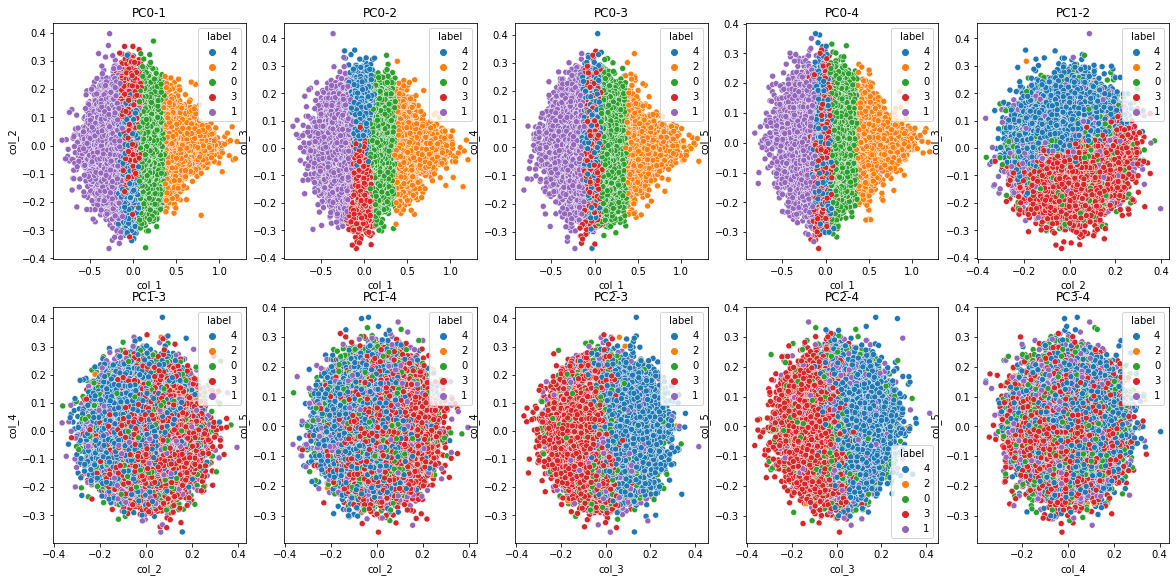

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
x=1
for i in range(4):
  for j in range(i+1,5):
    plt.subplot(4,5,x)
    sns.scatterplot(reduced_df.iloc[:,i],reduced_df.iloc[:,j], hue = reduced_df.iloc[:,-1].astype('str'))
    plt.title(f'PC{i}-{j}')
    x+=1
plt.show()

The above clusters are based on the customer embeddings learned by the deep learning model which learns product and user latent features similar to matrix factorization model. These user weights/embeddings represent product level preferences unlike the aisle level aggregated user data (see aisle level preferences section), such that they may represent quality, price, packaging, organic (or not) and other product level preferences and user demographics, income, etc.  

We can use the previous aisle level clustering model to group customers into high level categories, and use user-product level clustering model to group customers into more specific groups within the high level categories. For instance, high level category would classify a user as a small household with a baby, and then the specific group may represent their product preferences and income, demographics, hence would make better, customized product recommendations within "babies" aisle.

In [1]:
%%shell
jupyter nbconvert --to html //content/Instacart_Basket_Analysis_Customer_Segmentation_Product_Recommendation.ipynb

[NbConvertApp] Converting notebook //content/Instacart_Basket_Analysis_Customer_Segmentation_Product_Recommendation.ipynb to html
[NbConvertApp] Writing 3027529 bytes to //content/Instacart_Basket_Analysis_Customer_Segmentation_Product_Recommendation.html
